## 实现一个简单的 KMeans 聚类算法，以便更好地了解 KMeans 的原理和基本工作流程
>- 从头实现一个 `KMeans` 算法 (我称其 `lite_KMeans`)
>- 不借助任何像 `scikit-learn` 的机器学习集成库

### 1.相关理论知识
**KMeans 的基本原理：**  
- (1) 初始化：选择要分成的簇的数目 K。然后，「随机选择」K  个数据点作为初始聚类中心。  
- (2) 分配到最近簇：对于每个数据点，计算它与 K 个聚类中心之间的距离，通常使用欧氏距离。将数据点分配到距离最近的聚类中心所代表的簇。  
- (3) 更新聚类中心：对于每个簇，计算该簇内所有数据点的平均值，将这个平均值作为新的聚类中心。  
- (4) 迭代：重复步骤 (2) 和步骤 (3)，直到聚类中心不再变化或达到指定的迭代次数。  

**K均值聚类(KMeans)的目标：**  最小化每个数据点与其所属簇中心的距离，同时最大化不同簇中心之间的距离。


### 2.`lite_KMeans` 类的代码实现

In [78]:
# 导入相关的库
import numpy as np
import matplotlib.pyplot as plt

In [79]:
class lite_KMeans:
    def __init__(self, k=3):
        self.k = k
        self.centroids = None
        
    # 计算欧式距离的方法
    @staticmethod
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis=1))
    
    # 拟合：X是输入的聚类数据
    def fit(self, X, max_iterations=200):
        # 随即初始化聚类中心：在数据的边界内随机选择质心
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), 
                                            size=(self.k, X.shape[1]))
        # 迭代
        for _ in range(max_iterations):
            # 簇的标签
            y = []
            # 计算每个数据点到所有质心的欧式距离
            for data_point in X:
                distances = lite_KMeans.euclidean_distance(data_point, self.centroids)
                # 返回最小距离对应点的索引作为簇的标签
                cluster_num = np.argmin(distances)
                y.append(cluster_num)
            y = np.array(y)
            # 簇中数据点的索引
            cluster_indices = []
            #将数据集中被分配到每个簇的数据点的索引进行收集
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))
            # 新的聚类中心
            cluster_centers = []
            # 计算新的聚类中心
            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0])
            # 设置聚类中心更新的差异阈值
            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centers)
        return y

### 3.关于 `lite_KMeans` 的一些说明

#### 主要借助 `Numpy` 和 `Matplotlib`
```python
import numpy as np
import matplotlib.pyplot as plt
```
#### (1) 初始化聚类中心：随机初始化聚类中心的方法，但要确保聚类中心的初始化在数据的边界内，以提高算法的稳定性。
```python
self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))
```
#### (2) 计算欧式距离：定义静态方法 euclidean_distance 用于计算欧式距离。（静态方法不依赖于类的实例变量，可以在类外部直接调用）
```python
@staticmethod
def euclidean_distance(data_point, centroids):
    return np.sqrt(np.sum((centroids - data_point)**2, axis=1))
```
#### (3) 迭代更新：使用循环迭代，计算每个数据点到聚类中心的距离，然后根据最小距离更新数据点所属的簇。接着，计算每个簇的新中心（平均值），不断迭代直到聚类中心收敛或达到最大迭代次数。
```python
for _ in range(max_iterations):
    # ... 迭代过程 ...
```
#### (4) 停止条件：当聚类中心的更新小于阈值时停止迭代，确保算法在收敛时停止。
```python
if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
    break
```
#### (5) 其它相关说明：
- 在 lite_KMeans 类中，fit 方法的输入 X 是聚类算法的输入，代表要进行聚类的数据集。这个数据集是一个二维的 NumPy 数组，其中每一行表示一个数据点，每一列表示一个特征。假设 X 的形状为 (n_samples, n_features)。

- fit 方法的返回值 y 是聚类算法的输出，代表每个数据点所属的簇的标签。它是一个一维的 NumPy 数组，其中第 i 个元素表示第 i 个数据点所属的簇的标签。这个数组的长度应该等于输入数据集中数据点的个数，即 `len(y) == n_samples`。

### 4.`lite_KMeans` 的运行示例

In [80]:
# 随机生成数据集(100, 2)
# 每一行代表一个数据点，每一列代表特征（即每个点的坐标是由两个在 [0, 100) 范围内的随机整数组成）
random_points = np.random.randint(0, 100, (100, 2))
print(type(random_points))
print("数组形状：",random_points.shape)
print("前5行数据：\n", random_points[:5])

<class 'numpy.ndarray'>
数组形状： (100, 2)
前5行数据：
 [[61 66]
 [10 27]
 [76 22]
 [ 2 97]
 [86 46]]


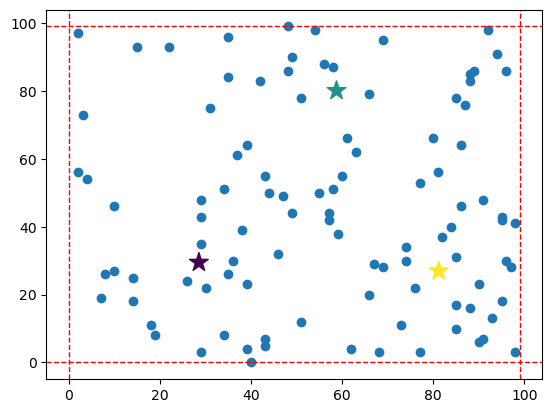

In [81]:
# 创建聚类模型示例，将数据聚到 3 簇
lite_kmeans = lite_KMeans(k=3)
# fit 方法执行了 lite_KMeans 聚类算法，并返回每个数据点所属的簇的标签
labels = lite_kmeans.fit(random_points)
# 可视化数据集 random_points 中的点
plt.scatter(random_points[:,0], random_points[:,1])
# 用虚线标出随机数据集生成的边界
# 画水平线
plt.axhline(y=np.amin(random_points), color='red', linestyle='--', linewidth=1)
plt.axhline(y=np.amax(random_points), color='red', linestyle='--', linewidth=1)
# 画垂直线
plt.axvline(x=np.amin(random_points), color='red', linestyle='--', linewidth=1)
plt.axvline(x=np.amax(random_points), color='red', linestyle='--', linewidth=1)
# 标记最终聚好的簇的中心点
plt.scatter(lite_kmeans.centroids[:,0], lite_kmeans.centroids[:,1], c=range(len(lite_kmeans.centroids)), marker="*", s=200)


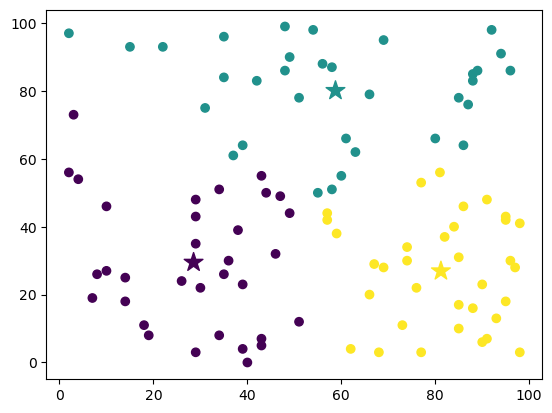

In [82]:
# 根据聚类得到的簇标签对数据点染色
plt.scatter(random_points[:,0], random_points[:,1], c=labels)
plt.scatter(lite_kmeans.centroids[:,0], lite_kmeans.centroids[:,1], c=range(len(lite_kmeans.centroids)), marker="*", s=200)

## 二、基于 `lite_KMeans` 的简单图像分割

In [83]:
# 需要借助 opencv-python 作图像的操作
import cv2
# 由于 cv2.imread 读入图像为 BGR 格式，故使用 skimage.io 读入图像
from skimage import io

### 1.图像读取

成功读取图像!
数据类型: uint8
存储结构: <class 'numpy.ndarray'>
数据维度: (1280, 1920, 3)


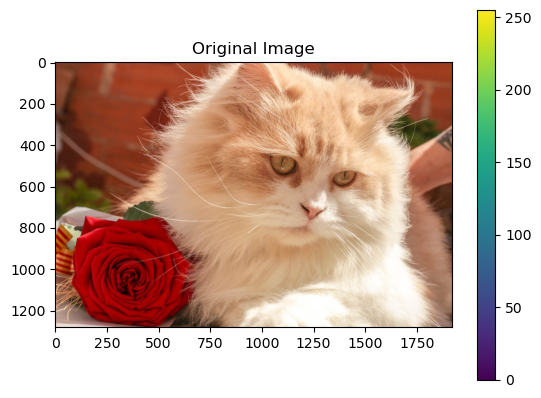

In [84]:
# 读取图像
image = io.imread('images/flower_cat.jpg')
# 检查是否成功读取图像，读取成功显示图像相关信息
if image is not None:
    print("成功读取图像!")
    print("数据类型:", image.dtype)
    print("存储结构:", type(image))
    print("数据维度:", image.shape)
    plt.imshow(image)
    plt.title('Original Image')
    # plt.axis('off')  # 关闭坐标轴
    plt.colorbar()  # 添加颜色条
    plt.show()
else:
    print("无法读取图像，请检查文件路径和文件格式")

### 2.图像预处理

**有时可能是为了适应特定的算法、模型输入的要求，或者简化图像以减少计算负担。会对读入后图像进行预处理，比如调整图像的尺寸大小、重塑图像数据维度、归一化以及灰度转化等等。**

#### (1) 调整图像尺寸大小

**利用 `opencv-python` 调整读入图像大小和尺寸，在这里减少计算负担，加快代码的运行速度。**
> `opencv` 默认使用的是双线性插值（Bilinear Interpolation），它使用周围最近的 4 个像素的加权平均值来计算新的像素值。保持图像的视觉质量，尽量减少像素丢失造成的影响。

调整后的图像数据：
数据类型: uint8
存储结构: <class 'numpy.ndarray'>
数据维度: (256, 384, 3)


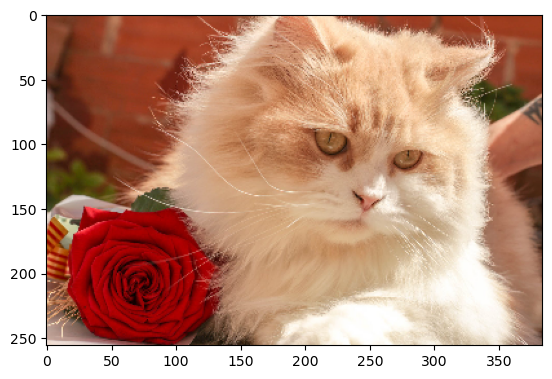

In [85]:
# 将图片等比例缩小 5 倍
resized_image = cv2.resize(image, (384, 256))
print("调整后的图像数据：")
print("数据类型:", resized_image.dtype)
print("存储结构:", type(resized_image))
print("数据维度:", resized_image.shape)
plt.imshow(resized_image)

#### (2) 重塑图像数据

**在使用 K 均值聚类进行颜色分割时，我们通常将图像中的每个像素视为一个数据点，其中数据点的特征是像素的颜色值。这时，将图像重塑为一对应的二维数据有助于直观地应用聚类算法。**
> 将图像中的像素颜色值重新排列成一个二维数组，其中每一行表示一个像素，每列代表颜色的三个通道（例如，红、绿、蓝）。这是应用 K 均值聚类算法的常见做法。

In [86]:
# 重塑数据，即获取像素点和其特征的二维数组
pixels = resized_image.reshape((-1, 3))  # 每个数据点是一个像素的颜色值，形状为 (num_pixels, 3)
print(pixels.shape)

(98304, 3)


#### (3) 可视化图像中像素点的颜色分布

**主要是可视化图像的像素点在 RGB 空间中的分布。**

In [87]:
# 借助相关库可视化 3D 空间中像素点分布
from mpl_toolkits.mplot3d import Axes3D

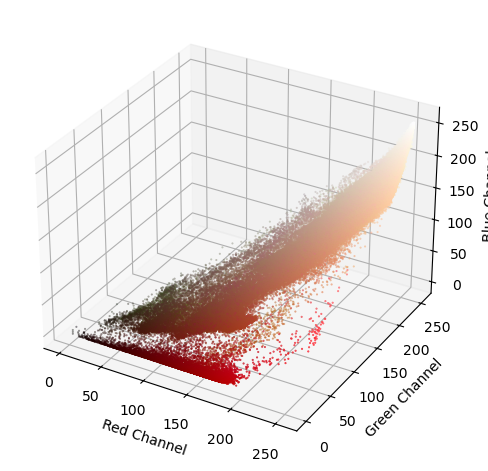

In [88]:
# X 是你的形状为 (n, 3) 的二维数组, 其中 n 是像素点的数量
# X is your 2D array with shape (n, 3), where n is the number of pixels
X = pixels
# 提取每个通道的值
# Extract values for each channel
r, g, b = X[:, 0], X[:, 1], X[:, 2]

# 创建一个新的三维坐标系
# Create a new three-dimensional coordinate system
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 使用红, 绿, 蓝通道作为 X, Y, Z 轴坐标在三维空间绘制像素点
# Plot pixels in the three-dimensional space, using R, G, B channels as X, Y, Z coordinates
ax.scatter(r, g, b, c=X/255, marker='.', s=1)  # Map color values to the [0, 1] range

# 设置轴标签
# Set axis labels
ax.set_xlabel('Red Channel')
ax.set_ylabel('Green Channel')
ax.set_zlabel('Blue Channel')

# 显示绘制的图像
# Display the plot
plt.tight_layout()
plt.tight_layout() # 调整布局，以确保图的元素不会重叠
plt.show()


### 3.利用 `lite_KMeans` 做简单图像分割

> 在 K 均值聚类中，每个簇都有一个代表性的颜色，称为聚类中心。分割后的图像中，每个像素都被标记为属于某个簇，然后用该簇的聚类中心颜色替代原始颜色。这样，图像就被分割成了 K 个颜色相对一致的区域。

- K 均值聚类：使用 lite_KMeans 类对图像数据进行了 K 均值聚类，得到每个像素点所属的簇标签 labels。

- 颜色替换：通过使用 kmeans.centroids 获取每个簇的聚类中心颜色，然后将每个像素的颜色替换为其所属簇的聚类中心颜色。

- 还原形状：使用 reshape 将一维数组重新变为与原始图像相同的形状，得到 segmented_image。

- 可视化：使用 Matplotlib 在一个图像窗口中显示了两个子图，一个是原始图像，另一个是分割后的图像。

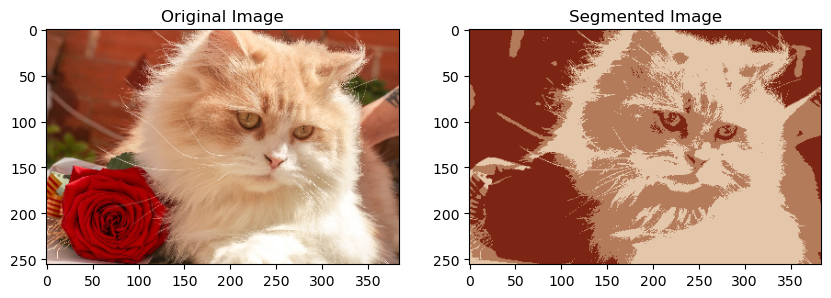

In [89]:
# 使用之前的 lite_KMeans 类进行图像分割
kmeans = lite_KMeans(k=3)  # 这里选择 3 个簇，你可以根据需要调整
labels = kmeans.fit(pixels)

# 将每个像素的颜色替换为其所属簇的聚类中心颜色，同时还原到重塑前图像数据维度
segmented_image = kmeans.centroids[labels].reshape(resized_image.shape)

# 显示原始图像和聚类（分割）后图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(resized_image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))    # 还原图像形状
plt.title('Segmented Image')

plt.show()


In [90]:
segmented_image.shape

(256, 384, 3)

### 4.相关说明和可改进的地方

- 选择 K（聚类簇的数量）对图像分割结果有着重要的影响。K 的选择反映了我们期望的分割细粒度，即图像中我们希望分离的区域的数量。以下是关于选择 K 大小的一些建议和注意事项：
    - K 太小：如果选择的 K 太小，可能导致图像分割过于简单，失去了对图像内部细节的划分。结果可能过于泛化，不足以捕捉到图像中的复杂结构。
    - K 太大：如果选择的 K 太大，可能导致过度分割，每个簇都可能只包含很少的像素，使得分割结果变得过于细粒度，不符合实际图像的结构。
- 比如，在自己实现的 `lite_KMeans` 类中， 对于初始聚类的中心的选取是采用的随机选取的方法，这样会导致每次图像分割的效果有着很大的随机性。而在已经集成好的 scikit-learn 库中的 KMeans 聚类则有着多种可供选择的初始化聚类中心方法，如默认的 kmeans++ 方法等。


#### 比如下面是又一次聚类和图像分割的效果，参数设置保持不变，但最后的效果这一次就比较差。

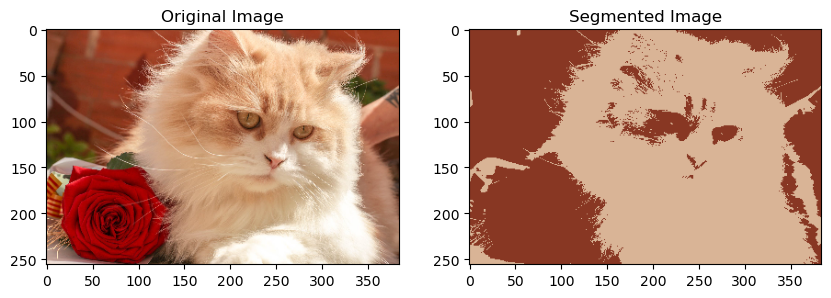

In [91]:
# 使用之前的 lite_KMeans 类进行图像分割
kmeans = lite_KMeans(k=3)  # 这里选择 3 个簇，你可以根据需要调整
labels = kmeans.fit(pixels)

# 将每个像素的颜色替换为其所属簇的聚类中心颜色，同时还原到重塑前图像数据维度
segmented_image = kmeans.centroids[labels].reshape(resized_image.shape)

# 显示原始图像和聚类（分割）后图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(resized_image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))    # 还原图像形状
plt.title('Segmented Image')

plt.show()